# Tick 2: pandas

* [Pandas warmup exercises](#Pandas-warmup-exercises---not-assessed) - not assessed
* [Questions 2a](#Questions-2a---worth-1-mark) - worth 1 mark
* [Questions 2b](#Questions-2b---worth-1-mark) - worth 1 mark
* [Investigation](#Investigation) - not assessed
* [Appendix](#Appendix)

In [42]:
from IPython.display import YouTubeVideo
#YouTubeVideo('RD_7YhsQ8hg', width=560, height=315)

We'll be working with data on the COVID-19 pandemic assembled by researchers at Johns Hopkins university.
(For more about the dataset, 
please see [_An interactive web-based dashboard to track COVID-19 in real time_](https://doi.org/10.1016/S1473-3099(20)30120-1) by Dong, Du, and Gardner, The Lancet, May 2020.)
For consistency of grading, we'll work with a snapshot taken on 13 December and available as [https://www.cl.cam.ac.uk/teaching/2021/DataSci/data/covid_global_20201213.csv](https://www.cl.cam.ac.uk/teaching/2021/DataSci/data/covid_global_20201213.csv). If you want to re-run your analyses on up-to-date data, the code to retrieve it is given in the appendix.

<div class="alert alert-warning">This assignment tests your understanding of the pandas library. YOUR CODE MUST USE PANDAS OPERATIONS such as groupby to split and process the data. Do not use Python 'for' loops or list comprehensions (except in plotting code).
</div>

* Watch out for whether the question asks you to submit a dataframe or an indexed array. It doesn't matter what order the rows and columns are in, only the contents.
* For many of the questions there are diagnostic plots. You don't have to reproduce them but, if you want to, the relevant code is in the appendix. You **do** have to reproduce the plots for questions (q5) and (q12).

## Pandas warmup exercises - not assessed

These are optional warmup exercises, to get you used to pandas. 
Use the following autograder settings:
```python
import ucamcl
GRADER = ucamcl.autograder('https://markmy.solutions', course='scicomp').subsection('ex2')
```
For these exercises, there is no answer for you to submit. Instead, the autograder shows a model answer.
Use it like this:
```python
q = GRADER.fetch_question('p1')  # these warmup exercises are labelled p1, p2, ...
print(q)
```

In [1]:
import ucamcl
GRADER = ucamcl.autograder('https://markmy.solutions', course='scicomp').subsection('ex2')

Waiting for you to log in ... done.


**Question (p1)** from section 4.1 and 5.1. Here are two ways to explore the contents of a column:
```python
stopsearch['outcome'].unique()            # gets a list of unique values
stopsearch.groupby('outcome').apply(len)  # gets counts for each value
```
The first method returns a list of length 17, and the second returns a Series of length 16. Why are they different lengths?
How can you get the counts for all 17 values? How can you sort the list of counts, largest to smallest? 

The first method includes NaN, this counts as an extra element. The number of NaNs can be counted as well by setting dropna to false in groupby.
```python
stopsearch.copy().fillna("NaN").groupby('outcome').apply(len)
```

**Question (p2)** from sections 5.1 and 5.2. We can find the most common age-range in the entire dataset with
```python
stopsearch['age_range'].mode().values[0]
```
(Note that `mode()` returns a Series object, and `.values[0]` gives us just the first item in the Series as a plain Python value.)
How can we produce a table listing the most common age-range for each ethnicity and gender?

```python
stopsearch.groupby(['officer_defined_ethnicity', 'gender'])['age_range'].agg(pandas.Series.mode)
```

**Question (p3)** from sections 5.1 and 5.2. 
Given the dataframe
```
df = pandas.DataFrame({'A': [0,0,0,1,1,1], 'B': [0,1,2,0,1,2], 'X': range(6)})
```
how do you produce a table that has rows for A, columns for B, and shows values of X?

In [3]:
import pandas
df = pandas.DataFrame({'A': [0,0,0,1,1,1], 'B': [0,1,2,0,1,2], 'X': range(6)})
df.set_index('A')

,B,X
A,,
0,0,0
0,1,1
0,2,2
1,0,3
1,1,4
1,2,5


**Question (p4).** There are three different levels in the `stopsearch['type']` column. Here are two different ways to extract three rows, one for each of the levels:
```python
stopsearch.drop_duplicates('type')
stopsearch.groupby('type').tail(1)
```
Look up the help for these two functions, and explain the difference.

The drop_duplicates method keeps the first element in the list of duplicates and the second method keeps the last element.

**Question (p5).** The columns in a pandas DataFrame are [Series](https://pandas.pydata.org/pandas-docs/stable/reference/series.html) objects, and they have all sorts of useful methods. Using the methods `isin` and `diff`,
take the subset of rows where `event_type` is 0 or 1, and then define a new column Δt containing the time since the preceding event.
```python
df = pandas.DataFrame({'time': [1,2,3,4,5,6,7,8], 'event_type': [0,0,2,1,0,1,2,1]})
```

In [4]:
df = pandas.DataFrame({'time': [1,2,3,4,5,6,7,8], 'event_type': [0,0,2,1,0,1,2,1]})

a = df[df['event_type'].isin([0, 1])]
dt = a['time'].diff()
b = a.copy()
b['dt'] = dt
b

,time,event_type,dt
0,1,0,NaN
1,2,0,1.0
3,4,1,2.0
4,5,0,1.0
5,6,1,1.0
7,8,1,2.0


**Question (p6)** from section 6.2. With the dataframe from the last question, add a column Δte that gives *within each event_type* the time since the last event of that type. Finally, sort the data by event_type and time, using [`sort_values`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html).
```jupyter
```

## Questions 2a - worth 1 mark
The first step in any data science work is to find out what the dataset consists of, and to preprocess it into a form that you can work with. Typically, this takes around 70% of a data scientist's time.
```python
GRADER = ucamcl.autograder('https://markmy.solutions', course='scicomp').subsection('tick2a')
```

In [2]:
import ucamcl
import pandas
import numpy as np
import matplotlib.pyplot as plt

In [3]:
GRADER = ucamcl.autograder('https://markmy.solutions', course='scicomp').subsection('tick2a')

Waiting for you to log in .. done.


**Question (q1).** Import the CSV file and print out a few lines, choosing the lines at random. The file
includes some rows that don't correspond to countries; for these rows `Population` is missing. Remove these rows, and store what's left as the data frame `covid`. How many rows are left?

```
num_rows = ...
GRADER.submit_answer(GRADER.fetch_question('q1'), num_rows)
```

In [27]:
import os.path
if os.path.exists('covid_global_20201213.csv'):
    print("file already downloaded")
else:
    !wget "https://www.cl.cam.ac.uk/teaching/2021/DataSci/data/covid_global_20201213.csv"

file already downloaded


In [28]:
df = pandas.read_csv('covid_global_20201213.csv')
covid = (df.dropna(subset=['Population']))
num_rows = len(covid)

In [29]:
GRADER.submit_answer(GRADER.fetch_question('q1'), num_rows)

Correct!


True

**Question (q2).** Complete this data frame listing the unique `(Country/Region, Province/State)` pairs that you removed.


| **Country/Region** | **Province/State** |
|---|---|
| Diamond Princess | NaN |

```
ans = ... # your answer as a DataFrame
GRADER.submit_answer(GRADER.fetch_question('q2'), ans)
```

In [30]:
ans = df[df['Population'].isna()][['Country/Region', 'Province/State']].drop_duplicates(['Country/Region', 'Province/State'])

In [31]:
GRADER.submit_answer(GRADER.fetch_question('q2'), ans)

Correct!


True

**Question (q3).** Complete this table listing the number of rows for each different `Province/State` linked to the UK. Include the case where `Province/State` is NaN.

| **Province/State** | |
|---|---|
| Anguilla | 326 |

```
ans = ... # your answer as an Indexed Array
GRADER.submit_answer(GRADER.fetch_question('q3'), ans.reset_index(name='n'))
```

In [32]:
ans = covid[covid['Country/Region'] == 'United Kingdom'][['Country/Region', 'Province/State']].groupby('Province/State', dropna=0).apply(len)

In [33]:
GRADER.submit_answer(GRADER.fetch_question('q3'), ans.reset_index(name='n'))

Correct!


True

**Question (q4).** Take the subset of the table that refers to the UK and for which `Province/State` is NaN. (This subset excludes the UK's dependent territories).
1. Convert the date strings to proper dates using [`pandas.to_datetime`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html)
2. Define a column `new_confirmed` giving the number of newly confirmed cases each day, and similarly `new_deaths`.
3. Define a column `smooth_new_confirmed` to be the average of `new_confirmed` over the past seven days. 

_This dataset happens to have one record for every country and every date, and so it's easy to find the number of newly confirmed cases by finding the difference between successive elements. In numpy we could do `np.insert(x[1:]-x[:-1],0,x[0])`. Pandas provides
[`diff`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.diff.html) 
which does the same thing except for the first element -- but sometimes simplicity is more valuable than correctness of corner cases, and a `diff`-based answer is fine.
For the rolling average, Pandas provides [`rolling`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.rolling.html)._

| **Date** | **Confirmed** | **Deaths** | **new_confirmed** | **new_deaths** | **smooth_new_confirmed** |
|---|---|---|---|---|---|
| 2020-01-30 | 0 | 0 | 0 | 0 | 0 |
| 2020-01-31 | 2 | 0 | 2 | 0 | 0.286 |

```
ans = ... # your answer as a DataFrame
q = GRADER.fetch_question('q4')
want = pandas.DataFrame(q.rows).assign(Date=lambda df: pandas.to_datetime(df.Date))
submit = ans.merge(want)[q.want_cols].assign(Date=lambda df: df.Date.astype(str))
GRADER.submit_answer(q, submit)
```

In [34]:
ans = (covid[(covid['Country/Region']=='United Kingdom') & (covid['Province/State'].isna())]).copy()
ans['Date'] = pandas.to_datetime(ans['Date'])
ans['new_confirmed'] = ans['Confirmed'].diff()
ans['new_deaths'] = ans['Deaths'].diff()
ans['smooth_new_confirmed'] = ans['new_confirmed'].rolling(window=7).mean()

In [35]:
q = GRADER.fetch_question('q4')
want = pandas.DataFrame(q.rows).assign(Date=lambda df: pandas.to_datetime(df.Date))
submit = ans.merge(want)[q.want_cols].assign(Date=lambda df: df.Date.astype(str))
GRADER.submit_answer(q, submit)

Correct!


True

**Question (q5).** Plot two bar charts, one showing the number of daily confirmed cases, the other showing the number of daily deaths. On your first bar chart, also plot the weekly-smoothed values.

_You don't have to submit your plot to the autograder, but you **must** include it in your submitted notebook. Your plot should look something like this. In your plot, you should pay attention to (1) making sure the subplots share the same x-axis, (2) making sure the x-axis ticks are legible. Don't worry about fine-grained control of the plot, such as plot size or colour scheme._

<img src="res/tick2_uk-timeseries.svg" style="width:45em"/>

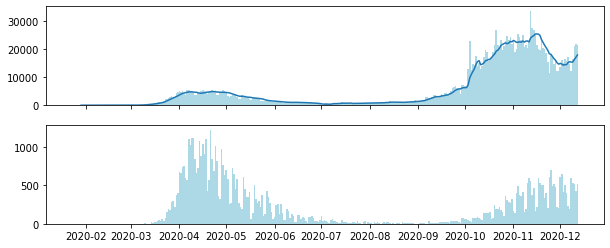

In [36]:
fig,(ax1,ax2) = plt.subplots(nrows=2,ncols=1, figsize=(10,4), sharex=True)

ax1.bar(ans['Date'], ans['new_confirmed'], width=1.0, color='lightblue')
ax1.plot(ans['Date'], ans['smooth_new_confirmed'])

ax2.bar(ans['Date'], ans['new_deaths'], width=1.0, color='lightblue')

plt.show()

**Question (q6).** Most countries in this dataset appear as `Country/Region=x, Province/State=NaN`, but there are a few, like the UK, that have non-NaN entries for `Province/State`. To see what the dataset contains, complete the following table. Here `metropole` is 1 if the country has a `Province/State=NaN` entry, 0 otherwise; and `provinces` is the number of distinct non-NaN values; and the table lists all the seven countries for which `metropole=0` or `provinces>0`.

| **Country/Region** | metropole | provinces |
|---|---|---|
| Australia | 0 | 8 |
| Canada | 1 | 13 |

```
ans = ... # your answer as a DataFrame
GRADER.submit_answer(GRADER.fetch_question('q6'), ans)
```

In [37]:
ans = pandas.DataFrame()

provinces = covid[covid['Country/Region'].isna() == 0].groupby(['Country/Region', 'Province/State']).apply(len).groupby('Country/Region').apply(len)
ans['provinces'] = provinces

metropoles = covid[(covid['Country/Region'].isin(ans.index)) & (covid['Province/State'].isna())]['Country/Region'].drop_duplicates()
metropoles = metropoles.reset_index()
metropoles['metropole'] = 1
del metropoles['index']

ans = ans.merge(metropoles, on='Country/Region', how='outer').fillna(0)
ans.metropole = ans.metropole.astype(int)

In [38]:
GRADER.submit_answer(GRADER.fetch_question('q6'), ans)

Correct!


True

**Question (q7).** Upon closer inspection of these special-case countries, we conclude there are two types of special case:
* For Australia, Canada, and China, we should add up the COVID statistics for each of the provinces
* For Denmark, France, Netherlands, and UK, we should only keep the `Province/State=NaN` entries and discard the others.

Prepare a dataset `covidc` which fixes up the data for these special-case countries, and includes all the non-special-case countries as is. In addition, 
* convert the date strings to proper dates
* merge in `Population` values and `iso3` codes from
[https://www.cl.cam.ac.uk/teaching/2021/DataSci/data/covid_countries_20201213.csv](https://www.cl.cam.ac.uk/teaching/2021/DataSci/data/covid_countries_20201213.csv), since the Population values in the original dataset don't account for the special-cased countries
* sort the dataset by `Country/Region` then by `Date`

| **Country/Region** | **Date** | **Confirmed** | **Deaths** | **Population** |
|---|---|---|---|---|
| United Kingdom | 2020-05-01 | 182270 | 27381 | 67886004 |
| United Kingdom | 2020-05-02 | 185491 | 27965 | 67886004 |


```
covidc = ... # your answer as a DataFrame
q = GRADER.fetch_question('q7')
want = pandas.DataFrame(q.rows).assign(Date=lambda df: pandas.to_datetime(df.Date))
submit = covidc.merge(want)[q.want_cols].assign(Date=lambda df: df.Date.astype(str))
GRADER.submit_answer(q, {'num_rows': len(covidc), 'details': submit})
```

<img src="res/tick2_global-cases.svg" style="width:30em">

In [39]:
import os.path
if os.path.exists('covid_countries_20201213.csv'):
    print("file already downloaded")
else:
    !wget "https://www.cl.cam.ac.uk/teaching/2021/DataSci/data/covid_countries_20201213.csv"

file already downloaded


In [49]:
covid_countries = pandas.read_csv('covid_countries_20201213.csv')
covid_countries = covid_countries[covid_countries['Province_State'].isna()]
covid_countries = covid_countries[['Population', 'iso3']]

covidc = covid.copy()
groupA = ['Australia', 'Canada', 'China']
groupB = ['Denmark', 'France', 'Netherlands', 'United Kingdom']

for country in groupA:
    old = covidc[covidc['Country/Region']==country]
    aggs = {'Province/State': 'first', 'Lat': 'first', 'Long': 'first', 'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum', 'Population': 'sum', 'iso3': 'first'}
    new = old.groupby(['Date', 'Country/Region']).agg(aggs).reset_index()
    new['Province/State'] = np.nan
    covidc = covidc[covidc['Country/Region']!=country]
    covidc = pandas.concat([covidc, new], ignore_index=True)
    

for country in groupB:
    covidc = covidc.drop(covidc[(covidc['Country/Region'] == country) & (covidc['Province/State'].notna())].index)
        
covidc['Date'] = pandas.to_datetime(covidc['Date'])
covidc = covidc.drop(columns=['Population'])
covidc.sort_values(['Country/Region', 'Date'])
covidc = covidc.dropna(how='all')

covidc = covidc.merge(covid_countries, on='iso3', how='left').sort_values(['Country/Region', 'Date'])
covidc['Confirmed'] = covidc['Confirmed'].astype(int)
covidc['Deaths'] = covidc['Deaths'].astype(int)
covidc['Population'] = covidc['Population'].astype(int)
covidc['Recovered'] = covidc['Recovered'].astype(int)

In [50]:
q = GRADER.fetch_question('q7')
want = pandas.DataFrame(q.rows).assign(Date=lambda df: pandas.to_datetime(df.Date))
submit = covidc.merge(want)[q.want_cols].assign(Date=lambda df: df.Date.astype(str))
GRADER.submit_answer(q, {'num_rows': len(covidc), 'details': submit})

Correct!


True

## Questions 2b - worth 1 mark
```python
GRADER = ucamcl.autograder('https://markmy.solutions', course='scicomp').subsection('tick2b')
```

In [51]:
GRADER = ucamcl.autograder('https://markmy.solutions', course='scicomp').subsection('tick2b')

Waiting for you to log in .. done.


**Question (q8).** We'd like to know the overall case fatality rate for each country.
To get overall figures, we'll just look at the total confirmed cases and deaths for each country.
Prepare a dataframe that lists this information.

| **Country/Region** | **Confirmed** | **Deaths** |
|---|---|---|
| Australia | 28030 | 908 |
| Austria | 319822 | 4415 |


```
ans = ... # your answer as a DataFrame
q = GRADER.fetch_question('q8')
submit = pandas.DataFrame(q.rows).merge(ans)[q.want_cols]
GRADER.submit_answer(q, submit)
```

<img src="res/tick2_cfr.svg" style="width:30em"/>

In [52]:
ans = covidc.groupby(['Country/Region']).tail(1)[['Country/Region', 'Confirmed', 'Deaths']].reset_index().drop('index', axis=1)

In [53]:
q = GRADER.fetch_question('q8')
submit = pandas.DataFrame(q.rows).merge(ans)[q.want_cols]
GRADER.submit_answer(q, submit)

Correct!


True

**Question (q9).** The bar chart from question q5 suggests that cases were undercounted in the first wave of the pandemic. Take the first wave to be until 14 July inclusive, and the second wave to be 15 July to the most recent date, and complete the following table
which lists the number of cases confirmed in each wave, and the number of deaths.


| **Country/Region** | **Confirmed1** | **Deaths1** | **Confirmed2** | **Deaths2** | 
|---|---|---|---|---|
| France | 199509 | 29929 | 2149286 | 27281 |
| United Kingdom | 291373 | 40899 | 1539583 | 23127 |

We'd like to be able to compare the spread of the disease in December versus March, and so we'd like case counts from the first and second waves to be comparable. We shall assume that true fatality rate (the fraction of infected people who die from the disease) is constant, and that the case counts from the first wave are undercounting. Add to your table a new column  called `case_multiplier`, defined as
$$
\textsf{case_multiplier} = \frac{\textsf{Deaths1}/\textsf{Confirmed1}}{\textsf{Deaths2}/\textsf{Confirmed2}}
$$

```
ans = ... # your table as a DataFrame
q = GRADER.fetch_question('q9')
submit = pandas.DataFrame(q.rows).merge(ans)[q.want_cols]
GRADER.submit_answer(q, submit)
```

*This is a huge simplification. There are differences in how countries define "death due to COVID", and there
are surely differences in standard-of-care, and in demographics. Nonetheless, the plot below shows that many countries have broadly similar case fataility rates in the second wave, so `case_multiplier` is probably measuring something real; and anyway, if we only use it to compare the two waves within a single country, it doesn't matter that different countries use different definitions. It would be better to use a smoothly-varying function rather than just two levels (a multipler for the 1st, a constant 1 for the 2nd wave), but this takes more work.*


<img src="res/tick2_cfr2.svg" style="width:30em"/>

In [54]:
ans = covidc.groupby(['Country/Region']).tail(1)[['Country/Region', 'Confirmed', 'Deaths']].reset_index().drop('index', axis=1)
ans = ans.rename(columns = {'Confirmed':'Confirmedtotal', 'Deaths': 'Deathstotal'})
a = (covidc[covidc['Date'] == '14/07/20'][['Country/Region', 'Confirmed', 'Deaths']])
a = a.rename(columns = {'Confirmed':'Confirmed1', 'Deaths': 'Deaths1'})
ans = ans.merge(a)
ans['Confirmed2'] = ans['Confirmedtotal'] - ans['Confirmed1']
ans['Deaths2'] = ans['Deathstotal'] - ans['Deaths1']
ans = ans.drop(['Confirmedtotal', 'Deathstotal'], axis=1)
ans['case_multiplier'] = (ans['Deaths1'] / ans['Confirmed1']) / (ans['Deaths2'] / ans['Confirmed2'])
multipliers = ans[['Country/Region', 'case_multiplier']]

In [55]:
q = GRADER.fetch_question('q9')
submit = pandas.DataFrame(q.rows).merge(ans)[q.want_cols]
GRADER.submit_answer(q, submit)

Correct!


True

**Question (q10).** For each country,
* Find the number of `new_confirmed` cases each day as in (q4), and multiply the first-wave counts by the corresponding `case_multiplier`. In maths notation, let $N_t=\alpha_t (C_t-C_{t-1})$, where $C_t$ is the number of confirmed cases recorded in the dataset for date $t$, where where $\alpha_t$ is the case multiplier for $t$ up to 14 July inclusive, and $\alpha_t=1$ for later $t$.
* Define a daily `smooth_new_confirmed` value as in (q4). In maths notation, let $S_t=(N_{t-6}+\cdots+N_t)/7$.
* Define a column `infected` which gives the total number of `smooth_new_confirmed` over the past $d$ days, where $d=10$ is the average duration of an infection -- this is a crude guess at the number of currently infected people. In maths notation, let $I_t=S_{t-d+1}+\cdots+S_t.$
* Define a column `inc` which measures the relative change. In maths notation, let $\Delta_t=I_t/I_{t-1}$.
* Define a column `R` which reports the daily $R$ number, which can be calculated by $R_t=d(\Delta_t-1)+1$.

| **Country/Region** | **Date** | **Confirmed** | **new_confirmed** | **smooth_new_confirmed** | **infected** | **inc** | **R** |
|---|---|---|---|---|---|---|---|
| United Kingdom | 2020-05-01 | 182270 | 44170.5 | 42392.5 | 436857.1 | 0.995 | 0.947 |
| United Kingdom | 2020-05-02 | 185491 | 30098.0 | 41689.0 | 433240.9 | 0.992 | 0.917 |

```
ans = ... # Your answer as a DataFrame
q = GRADER.fetch_question('q10')
want = pandas.DataFrame(q.rows).assign(Date=lambda df: pandas.to_datetime(df.Date))
submit = ans.merge(want)[q.want_cols].assign(Date=lambda df: df.Date.astype(str))
GRADER.submit_answer(q, submit)
```

In [56]:
d = 10

ans = covidc.copy()
ans = ans.merge(multipliers)
ans['new_confirmed'] = ans.groupby('Country/Region')['Confirmed'].transform(lambda x: x.diff())

multiplied = ans.loc[:, 'Date'] <= '14/07/20'
m = ans.copy()[multiplied]
m['new_confirmed'] *= m['case_multiplier']
ans[multiplied] = m

ans['smooth_new_confirmed'] = ans.groupby('Country/Region')['new_confirmed'].transform(lambda x: x.rolling(window=7).mean())
ans['infected'] = ans.groupby('Country/Region')['smooth_new_confirmed'].transform(lambda x: x.rolling(window=d).sum())
ans['inc'] = ans.groupby('Country/Region')['infected'].transform(lambda x: x.pct_change() + 1)
ans['R'] = (d * (ans['inc'] - 1)) + 1

In [57]:
q = GRADER.fetch_question('q10')
want = pandas.DataFrame(q.rows).assign(Date=lambda df: pandas.to_datetime(df.Date))
submit = ans.merge(want)[q.want_cols].assign(Date=lambda df: df.Date.astype(str))
GRADER.submit_answer(q, submit)

Correct!


True

**Question (q11).** Plot $R$ against against the number of infected people per 100k, one point per day, one subplot per country,
showing the UK, Italy, Germany, and the USA.
Annotate your plot with [axhline](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.axhline.html) to show $R=1$,
and with [axhspan](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.axhspan.html)
to show the range of $R$ values that are in between "infections double every two weeks" and "infections halve every two weeks", that is, between $\Delta=2^{1/14}$ and $\Delta=0.5^{1/14}$.

_You don't have to submit your plot to the autograder, but you **must** include it in your submitted notebook. Your plot should look something like this. In your plot, you should pay attention to (1) making sure the subplots share the same x-axis, (2) using a log x-axis, (3) colour-coding the points to indicate what's recent versus what's historic. Annotating your plot with notable events is optional. Don't worry about fine-grained control of the plot, such as plot size or colour scheme._

<img src="res/tick2_phase.svg" style="width:40em"/>

Text(0.5, 0, 'num. infected per 100k')

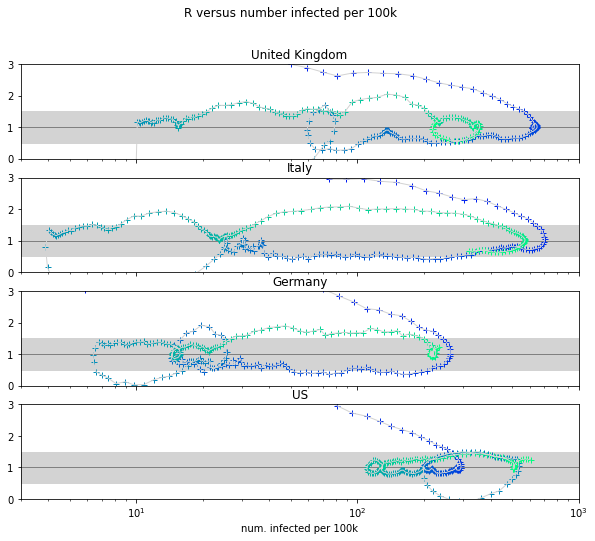

In [59]:
df = ans
df['infper100k'] = (df['infected'] / df['Population']) * 100000
df = df[['Country/Region', 'Date', 'R', 'infper100k']]
countries = ['United Kingdom', 'Italy', 'Germany', 'US']

fig, (ax1,ax2,ax3,ax4) = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(10,8))

for (ax, c) in zip([ax1,ax2,ax3, ax4], countries):
    country = df[df['Country/Region'] == c]
    x = country['infper100k']
    y = country['R']
    cols = plt.get_cmap('Set2', len(x))
    ax.set_xscale('log')
    ax.set_xlim([3,1000])
    ax.set_ylim([0,3])
    ax.set_title(c)
    ax.plot(x, y, linewidth=1, color='lightgrey')
    ax.scatter(x, y, c=country['Date'], cmap='winter', marker='+', linewidth=1)
    ax.axhline(y=1, color='grey', linewidth=1).set_zorder(0)
    ax.axhspan(ymin=0.5, ymax=1.5, color='lightgrey').set_zorder(0)
    
fig.suptitle('R versus number infected per 100k')
plt.xlabel('num. infected per 100k')

## Investigation

More granular data for the UK is available at [https://coronavirus.data.gov.uk/details/download](https://coronavirus.data.gov.uk/details/download). Repeat this exercise, but applied to your own region. The data includes details of number of tests, saving us the `case_multiplier` hack.

## Appendix

### Fetching the data

This data is from a Johns Hopkins university [github repository](https://github.com/CSSEGISandData/COVID-19). For more about the dataset, 
please see [_An interactive web-based dashboard to track COVID-19 in real time_](https://doi.org/10.1016/S1473-3099(20)30120-1) by Dong, Du, and Gardner, The Lancet, May 2020.

```python
BASE_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data'
confirmed = pandas.read_csv(f'{BASE_URL}/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths = pandas.read_csv(f'{BASE_URL}/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered = pandas.read_csv(f'{BASE_URL}/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
countries = pandas.read_csv(f'{BASE_URL}/UID_ISO_FIPS_LookUp_Table.csv')

id_vars = ['Province/State','Country/Region','Lat','Long']
x1 = confirmed.melt(id_vars=id_vars, var_name='Date', value_name='Confirmed')
x2 = deaths.melt(id_vars=id_vars, var_name='Date', value_name='Deaths')
x3 = recovered.melt(id_vars=id_vars, var_name='Date', value_name='Recovered')
x = pandas.merge(x1,x2, how='outer', validate='1:1', on=id_vars + ['Date'])
x = pandas.merge(x, x3, how='outer', validate='1:1', on=id_vars + ['Date'])
for v in ['Confirmed','Deaths','Recovered']:
    x[v] = np.where(pandas.isna(x[v]), 0, x[v]).astype(int)
covid = x

covid = covid.merge(countries[['Country_Region','Province_State','Population','iso3']],
                    left_on = ['Country/Region','Province/State'],
                    right_on = ['Country_Region', 'Province_State'],
                    how = 'left')

covid.drop(columns=['Country_Region', 'Province_State'], inplace=True)

covid.to_csv('covid_global_latest.csv', index=False)
```

### Snippets for plotting

In [ ]:
# Question 7

want_countries = ['Austria','Belgium','Czechia','Denmark','Finland','France','Germany',
                  'Greece','Hungary','Ireland','Italy',
                  'Netherlands','Norway','Poland','Portugal','Spain','Sweden','Switzerland','United Kingdom',
                  'Australia','US','Canada','Japan','China','Russia','Ukraine','India']

fig,ax = plt.subplots(figsize=(8,4))
for c in want_countries:
    df = covidc.loc[covidc['Country/Region']==c]
    x,y = df.Confirmed / df.Population*100000, df.Deaths / df.Population*100000
    ax.plot(x, y, label=c)
    # note: ax.text can only plot one text label at a time
    ax.text(x.iloc[-1], y.iloc[-1], c, ha='left', va='baseline')
ax.set_xlabel('confirmed/100k')
ax.set_ylabel('deaths/100k')
plt.show()

In [ ]:
# Question 8

df = ... # dataframe for Question 8
df = df.loc[df['Country/Region'].isin(want_countries)]

fig,ax = plt.subplots(figsize=(8,6))
ax.scatter(df.Confirmed, df.Deaths)
for i in range(len(df)):
    ax.text(df.Confirmed.iloc[i]*1.055, df.Deaths.iloc[i], df['Country/Region'].iloc[i], ha='left', va='center',
           fontsize=7)
xx = np.power(10, np.linspace(4.5,7.4,100))
for cfr in [.01,.02,.04]:
    ax.plot(xx, xx*cfr, color='0.6', linestyle='dashed')
    ax.text(xx[-1], xx[-1]*cfr, f'cfr {cfr*100}%', ha='left')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('confirmed cases')
ax.set_ylabel('deaths')
plt.show()

In [ ]:
# Question 9

df = ... # dataframe for Question 9
df = df.loc[df['Country/Region'].isin(want_countries)]

fig,ax = plt.subplots(figsize=(8,6))
ax.scatter(df.Confirmed1, df.Deaths1, color='cornflowerblue')
ax.scatter(df.Confirmed2, df.Deaths2, color='goldenrod')
for i in range(len(df)):
    x1,y1 = df.Confirmed1.iloc[i], df.Deaths1.iloc[i]
    x2,y2 = df.Confirmed2.iloc[i], df.Deaths2.iloc[i]
    ax.plot([x1,x2],[y1,y2], color='black', alpha=.4, linewidth=.5, zorder=-1)
    # the nudge *1.055 is just to offset the text label from the marker
    ax.text(x2*1.055,y2, df['Country/Region'].iloc[i], ha='left', va='center', fontsize=7)
xx = np.power(10, np.linspace(4.5,7.4,100))
for cfr in [.01,.02,.04]:
    ax.plot(xx, xx*cfr, color='0.6', linestyle='dashed')
    ax.text(xx[-1], xx[-1]*cfr, f'cfr {cfr*100}%', ha='left')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('confirmed cases')
ax.set_ylabel('deaths')
plt.show()

In [ ]:
# Question 12

# Data for special dates

import io
specials = pandas.read_csv(io.StringIO('''
Country/Region,Date,event
"United Kingdom",2020-03-23,"lockdown"
,2020-07-04,"open"
,2020-07-24,"facemasks"
,2020-09-14,"unsocial"
,2020-09-17,"local"
,2020-10-03,"local"
,2020-10-14,"local"
,2020-10-23,"local"
,2020-11-05,"lockdown2"
,2020-12-02,"open2"
'''))
specials['Date'] = pandas.to_datetime(specials['Date'])
specials['Country/Region'] = specials['Country/Region'].fillna(method='ffill')

# To show these specials as annotations:
# merge the specials dataframe with your full per-country-and-date dataframe,
# and then just plot the points where event isn't NaN.